In [1]:
#!pip install pandas numpy matplotlib seaborn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
data_train = pd.read_csv('data/sales_train.csv')

In [9]:
ttl_r = len(data_train)
print(f'rows total: {len(data_train)}')
for col in data_train:
    print(col, data_train[col].nunique())

rows total: 2935849
date 1034
date_block_num 34
shop_id 60
item_id 21807
item_price 19993
item_cnt_day 198


In [10]:
print(data_train['date_block_num'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


<Axes: >

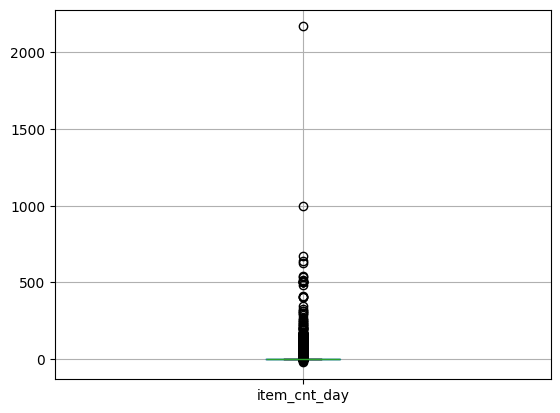

In [11]:
data_train.boxplot(column='item_cnt_day')

In [12]:
print('number of negative sales:',sum(data_train['item_cnt_day']<0))
data_train[data_train['item_cnt_day']<0]

number of negative sales: 7356


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [13]:
item_cat = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')

In [14]:
item_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [15]:
print('unique counts per id in item_cat:',item_cat.groupby(by='item_category_id').nunique().reset_index()['item_category_name'].unique())
print('unique counts per id in item_cat:',items.groupby(by='item_id').nunique().reset_index()['item_name'].unique())
print('unique counts per id in item_cat:',shops.groupby(by='shop_id').nunique().reset_index()['shop_name'].unique())

unique counts per id in item_cat: [1]
unique counts per id in item_cat: [1]
unique counts per id in item_cat: [1]


In [16]:
print('unique counts per name in item_cat:',item_cat.groupby(by='item_category_name').nunique().reset_index()['item_category_id'].unique())
print('unique counts per name in item_cat:',items.groupby(by='item_name').nunique().reset_index()['item_id'].unique())
print('unique counts per name in item_cat:',shops.groupby(by='shop_name').nunique().reset_index()['shop_id'].unique())

unique counts per name in item_cat: [1]
unique counts per name in item_cat: [1]
unique counts per name in item_cat: [1]


In [17]:

#merged = data_train.merge(items,how='left').merge(item_cat,how='left').merge(shops,how='left')
#print('Nans in merged:\n',merged.isna().sum(),sep='')

In [18]:
#средняя цена по месяцам, средняя товара по категориям и магазинам, за месяц
len(data_train[data_train['item_price'] < 0].index) + len(data_train[data_train['item_price'] >= 100000].index)+len(data_train[data_train['item_cnt_day'] < 0].index)

7358

In [19]:
data_train = data_train.drop(data_train[data_train['item_price'] < 0].index)
data_train = data_train.drop(data_train[data_train['item_price'] > 100000].index)

In [20]:
data_train = data_train.drop(data_train[data_train['item_cnt_day'] < 0].index)

In [21]:
data_train[data_train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [22]:
data_train=data_train.drop_duplicates()

In [23]:
idxs = set(items.item_id)-set(data_train.item_id)
items = items[~items['item_id'].isin(idxs)]
items.to_csv('data_cleaned/items.csv')

In [24]:
print('elements remain:')
print(len(data_train))
print('percent removed:',1-len(data_train)/ttl_r)
data_train.describe()

elements remain:
2928485
percent removed: 0.002508303390262867


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928485e+06,2.928485e+06,2.928485e+06,2.928485e+06,2.928485e+06
mean,1.456977e+01,3.300294e+01,1.020029e+04,8.893621e+02,1.248338e+00
std,9.422957e+00,1.622543e+01,6.324392e+03,1.718155e+03,2.619589e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,2.169000e+03


In [ ]:
data_train.to_csv('data_cleaned/data_train.csv', mode='w',index=False)
shops.to_csv('data_cleaned/shops.csv', mode='w',index=False)
item_cat.to_csv('data_cleaned/item_categories.csv', mode='w',index=False)